Setting the seed for reproducable results

In [0]:
%tensorflow_version 1.x

In [0]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
from collections import Counter
import matplotlib.pyplot as plt

Importing Library

In [0]:
#dealing with midi files
from music21 import * 
#array processing
import numpy as np     
import os
#random number generator
import random         
#keras for building deep learning model
from keras.layers import * 
from keras.models import *
import keras.backend as K
from keras.callbacks import *

from sklearn.model_selection import train_test_split

Function for reading midi file

In [0]:
def read_midi(file):
  notes=[]
  notes_to_parse = None
  #parsing a midi file
  midi = converter.parse(file)
  #grouping based on different instruments
  s2 = instrument.partitionByInstrument(midi)
  #Looping over all the instruments
  if s2 == None:
    print("NoneType !")
    return None
  print("")
  for part in s2.parts:
    #select elements of only piano
    if 'Piano' in str(part):
      notes_to_parse = part.recurse()
    else:
      notes_to_parse = None
    
    #finding whether a particular element is note or a chord
    if notes_to_parse != None:
      for element in notes_to_parse:
        if isinstance(element, note.Note):
          notes.append(str(element.pitch))
        elif isinstance(element, chord.Chord):
          notes.append('.'.join(str(n) for n in element.normalOrder))

  return notes

In [54]:
from google.colab import drive 
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [0]:
drive_path    = 'drive/My Drive/ECE496 CNN/'
data_in_path  = 'Trial/'
output_path ='Output_midi/'

midi_dir = drive_path + data_in_path
out_dir = drive_path + output_path

Reading midi files from directory

In [56]:
#read all the filenames
#files=[i for i in "drive/My Drive/ECE496 CNN/Dataset"]
#reading each midi file
all_notes=[]
for file_name in sorted(os.listdir("drive/My Drive/ECE496 CNN/Trial")):
  print(file_name)
  all_notes.append(np.array(read_midi(midi_dir + file_name)))

#notes and chords of all the midi files
notes = [element for notes in all_notes for element in notes]

001.midi

002.midi

003.midi

004.midi

005.midi

006.midi

007.midi

008.midi

009.midi

010.midi

011.midi

012.midi

013.midi

014.midi

015.midi

016.midi

017.midi

018.midi

019.midi

020.midi

021.midi

022.midi

023.midi

024.midi

025.midi

026.midi

027.midi

028.midi

029.midi

030.midi

031.midi

032.midi

033.midi

034.midi

035.midi

036.midi

037.midi

038.midi

039.midi

040.midi

041.midi

042.midi

043.midi

044.midi

045.midi

046.midi

047.midi

048.midi

049.midi

050.midi

051.midi

052.midi

053.midi

054.midi

055.midi

056.midi

057.midi

058.midi

059.midi

060.midi

061.midi

062.midi

063.midi

064.midi

065.midi

066.midi

067.midi

068.midi

069.midi

070.midi

071.midi

072.midi

073.midi

074.midi

075.midi

076.midi

077.midi

078.midi

079.midi

080.midi

081.midi

082.midi

083.midi

084.midi

085.midi

086.midi

087.midi

088.midi

089.midi

090.midi

091.midi

092.midi

093.midi

094.midi

095.midi

096.midi

097.midi

098.midi

099.midi

100.midi



Analyzing data

(array([352.,  21.,   6.,   3.,   5.,   5.,   3.,   3.,   1.,   2.]),
 array([1.0000e+00, 1.0430e+03, 2.0850e+03, 3.1270e+03, 4.1690e+03,
        5.2110e+03, 6.2530e+03, 7.2950e+03, 8.3370e+03, 9.3790e+03,
        1.0421e+04]),
 <a list of 10 Patch objects>)

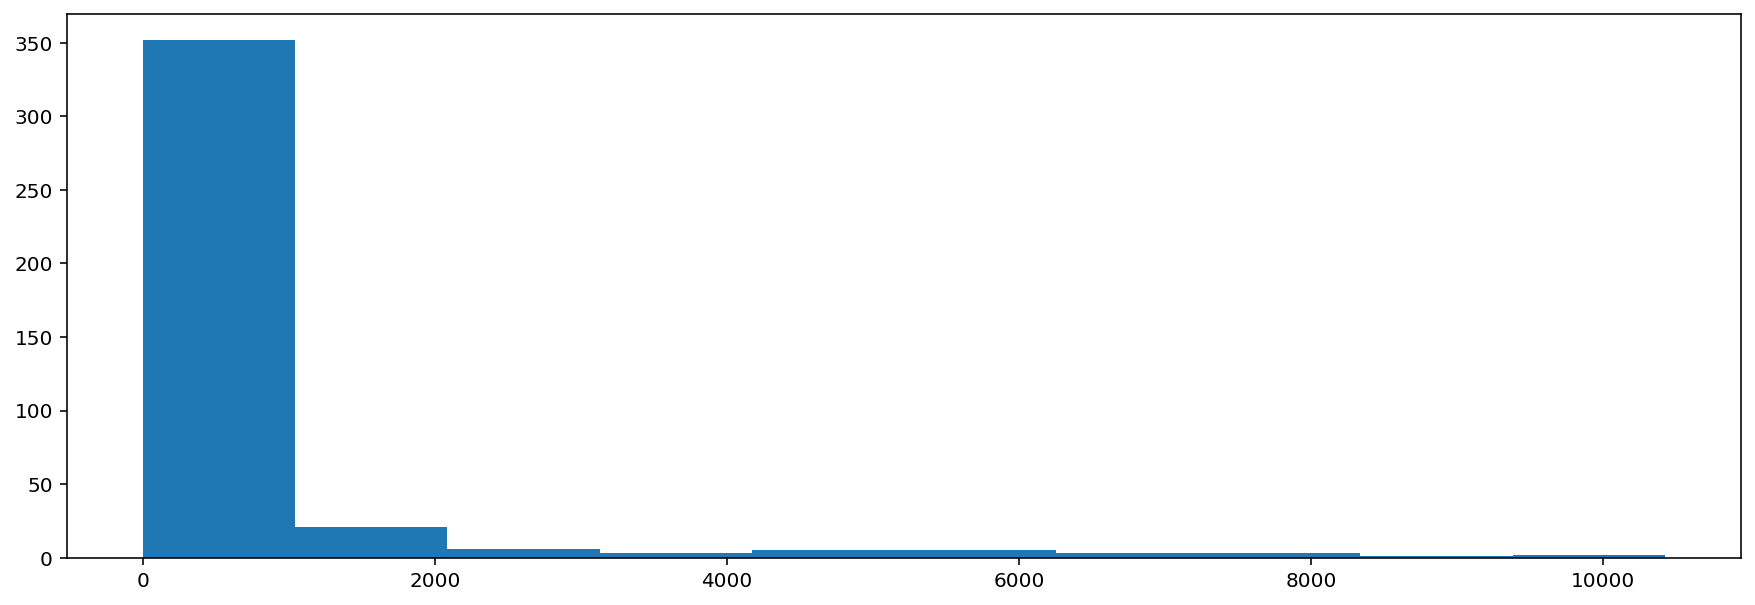

In [57]:
unique_notes = list(set(notes))
freq = dict(Counter(notes))

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(15,5))

#plot
plt.hist(no)

In [58]:
frequent_notes = [notes for notes, count in freq.items() if count>=10]
print(len(frequent_notes))

272


In [59]:
len(unique_notes)

401

New array that contains only the top frequency notes

In [0]:
new_music = []
for elm in all_notes:
  temp = []
  for a in elm:
    if a in frequent_notes:
      temp.append(a)
  new_music.append(temp)

new_music = np.array(new_music)

In [0]:
new_music.shape

Preparing input and output sequences

In [0]:
#length of a input sequence
no_of_timesteps = 32

x = []
y = []

for elm in new_music:
  for i in range(0, len(elm) - no_of_timesteps, 1):

    #preparing input and output sequences
    inp = elm[i:i + no_of_timesteps]
    out = elm[i + no_of_timesteps]

    x.append(inp)
    y.append(out)

x = np.array(x)
y = np.array(y)


#no. of unique notes
#n_vocab = len(set(notes))  
#all the unique notes
#pitch = sorted(set(item for item in notes))  
#assign unique value to every note
#note_to_int = dict((note, number) for number, note in enumerate(pitch))
#preparing input and output sequences
#X = []
#y = []
#for notes in all_notes:
#  for i in range(0, len(notes) - no_of_timesteps, 1):
#    input_ = notes[i:i + no_of_timesteps]
#    output = notes[i + no_of_timesteps]
#    X.append([note_to_int[note] for note in input_])
#    y.append(note_to_int[output])

In [0]:
x[1]

In [0]:
y[1]

Assigning a unique integer to every input note:

In [0]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

x_seq = []
for i in x:
  temp = []
  for j in i:
    temp.append(x_note_to_int[j])
  x_seq.append(temp)

x_seq = np.array(x_seq)

Assigning a unique integer to every output note:

In [0]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

80% of the data for training and the rest 20% for the validation:

In [0]:
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

Reshaping the input for the Convolution 1D and then normalizing

In [0]:
#reshaping
#X = np.reshape(X, (len(X), no_of_timesteps, 1))
#normalizing the inputs
#X = X / float(n_vocab) 

WaveNet Model

In [64]:
K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 100)           27200     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 32, 64)            19264     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 16, 128)           24704     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 8, 128)           

In [0]:
#K.clear_session()
#def simple_wavenet():
#  no_of_kernels=64
#  num_of_blocks= int(np.sqrt(no_of_timesteps)) - 1   #no. of stacked conv1d layers

#  model = Sequential()
#  for i in range(num_of_blocks):
#    model.add(Conv1D(no_of_kernels,3,dilation_rate=(2**i),padding='causal',activation='relu'))
#  model.add(Conv1D(1, 1, activation='relu', padding='causal'))
#  model.add(Flatten())
#  model.add(Dense(128, activation='relu'))
#  model.add(Dense(n_vocab, activation='softmax'))
#  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
#  return model

Save the best model during training

In [0]:
mc=ModelCheckpoint('drive/My Drive/ECE496 CNN/Saved Models/best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)


Save the model after every 10 epochs

In [0]:
#mc = keras.callbacks.ModelCheckpoint('drive/My Drive/ECE496 CNN/Saved Models/model{epoch:03d}.h5', save_weights_only=False, period=10)

Train the model with a batch size of 128 for 50 epochs

In [0]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=200, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])


Train on 179364 samples, validate on 44841 samples
Epoch 1/200
179364/179364 [==============================] - 17s 97us/step - loss: 3.4919 - val_loss: 3.3255

Epoch 00001: val_loss improved from inf to 3.32554, saving model to drive/My Drive/ECE496 CNN/Saved Models/best_model.h5
Epoch 2/200
179364/179364 [==============================] - 11s 62us/step - loss: 3.0849 - val_loss: 3.2023

Epoch 00002: val_loss improved from 3.32554 to 3.20227, saving model to drive/My Drive/ECE496 CNN/Saved Models/best_model.h5
Epoch 3/200
179364/179364 [==============================] - 12s 65us/step - loss: 2.9618 - val_loss: 3.0704

Epoch 00003: val_loss improved from 3.20227 to 3.07036, saving model to drive/My Drive/ECE496 CNN/Saved Models/best_model.h5
Epoch 4/200
179364/179364 [==============================] - 11s 60us/step - loss: 2.8867 - val_loss: 3.0137

Epoch 00004: val_loss improved from 3.07036 to 3.01369, saving model to drive/My Drive/ECE496 CNN/Saved Models/best_model.h5
Epoch 5/200


Loading the best model

In [0]:
model = load_model('drive/My Drive/ECE496 CNN/Saved Models/best_model.h5')

Instantiate and train the model with a batch size of 128:

In [0]:
#model = simple_wavenet()
#model.fit(X,np.array(y), epochs=40, batch_size=128,callbacks=[mc])

The steps mentioned under the inference phase for the predictions:

In [67]:
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

#random_music = x_val[1350]

predictions=[]
for i in range(10):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

[4, 6, 6, 6, 6, 51, 171, 51, 51, 6]


Convert the integers back into the notes:

In [0]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]

Convert back the predictions into a MIDI file:

In [0]:
def convert_to_midi(prediction_output):

  offset = 0
  output_notes = []

  # create note and chord objects based on the values generated by the model
  for pattern in prediction_output:
    # pattern is a chord
    if ('.' in pattern) or pattern.isdigit():
      notes_in_chord = pattern.split('.')
      notes = []

      for current_note in notes_in_chord:
        cn=int(current_note)
        new_note = note.Note(cn)
        new_note.storedInstrument = instrument.Piano()
        notes.append(new_note)
      
      new_chord = chord.Chord(notes)
      new_chord.offset = offset
      output_notes.append(new_chord)

    # pattern is a note
    else:
      new_note = note.Note(pattern)
      new_note.offset = offset
      new_note.storedInstrument = instrument.Piano()
      output_notes.append(new_note)

    # increase offset each iteration so that notes do not stack
    offset += 1

  midi_stream = stream.Stream(output_notes)
  midi_stream.write('midi', fp='drive/My Drive/ECE496 CNN/Output/music_new.midi')


Converting the predictions into a musical file:

In [0]:
convert_to_midi(predicted_notes)

USER INPUT:

(array([67., 28., 18.,  9.,  4.,  6.,  4.,  3.,  1.,  3.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <a list of 10 Patch objects>)

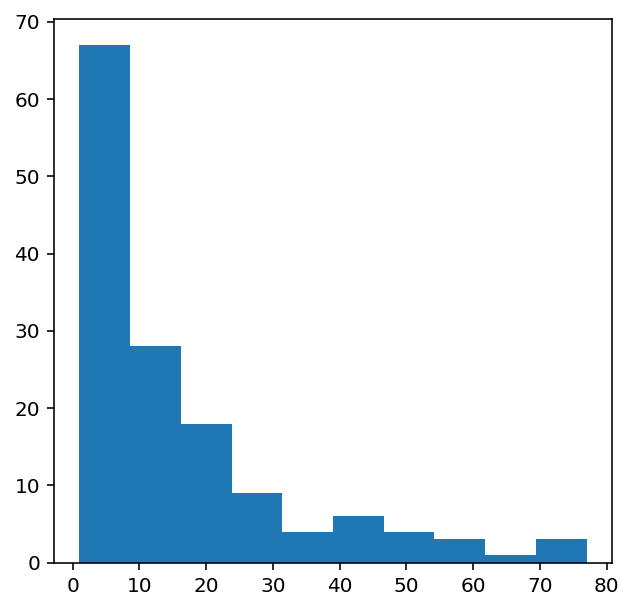

In [177]:
drive_path2    = 'drive/My Drive/ECE496 CNN/'
data_in_path2  = 'Input/'
output_path2 ='Output_new/'

midi_dir2 = drive_path + data_in_path
out_dir2 = drive_path + output_path



all_notes2=[]

all_notes2.append(np.array(read_midi("drive/My Drive/ECE496 CNN/Input/input.midi")))


#notes and chords of all the midi files
notes2 = [element for notes2 in all_notes2 for element in notes2]


unique_notes2 = list(set(notes2))
freq2 = dict(Counter(notes2))

#consider only the frequencies
no2=[count for _,count in freq2.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no2)



In [0]:
frequent_notes2 = [notes2 for notes2, count in freq2.items() if count>=50]
#print(len(frequent_notes2))

In [0]:
new_music2 = []
for elm in all_notes2:
  temp = []
  for a in elm:
    if a in frequent_notes2:
      temp.append(a)
  new_music2.append(temp)

new_music2 = np.array(new_music2)


#length of a input sequence
no_of_timesteps = 32

x2 = []
#y = []

for elm in new_music2:
  for i in range(0, len(elm) - no_of_timesteps, 1):

    #preparing input and output sequences
    inp = elm[i:i + no_of_timesteps]
    #out = elm[i + no_of_timesteps]

    x2.append(inp)
    #y.append(out)

x2 = np.array(x2)
#y = np.array(y)


unique_x2 = list(set(x2.ravel()))
x_note_to_int2 = dict((note_, number) for number, note_ in enumerate(unique_x2))

x_seq2 = []
for i in x2:
  temp = []
  for j in i:
    temp.append(x_note_to_int2[j])
  x_seq2.append(temp)

x_seq2 = np.array(x_seq2)

In [0]:
#len(x_seq2)

In [0]:
random_music2 = x_seq2[300]

predictions2=[]
for i in range(20):

    random_music2 = random_music2.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music2)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions2.append(y_pred)

    random_music2 = np.insert(random_music2[0],len(random_music2[0]),y_pred)
    random_music2 = random_music2[1:]
    
#print(predictions2)

In [0]:
#x_int_to_note2 = dict((number, note_) for number, note_ in enumerate(unique_x2)) 

In [0]:
predicted_notes2 = [x_int_to_note[i] for i in predictions2]

In [0]:
def convert_to_midi2(prediction_output):

  offset = 0
  output_notes = []

  # create note and chord objects based on the values generated by the model
  for pattern in prediction_output:
    # pattern is a chord
    if ('.' in pattern) or pattern.isdigit():
      notes_in_chord = pattern.split('.')
      notes = []

      for current_note in notes_in_chord:
        cn=int(current_note)
        new_note = note.Note(cn)
        new_note.storedInstrument = instrument.Piano()
        notes.append(new_note)
      
      new_chord = chord.Chord(notes)
      new_chord.offset = offset
      output_notes.append(new_chord)

    # pattern is a note
    else:
      new_note = note.Note(pattern)
      new_note.offset = offset
      new_note.storedInstrument = instrument.Piano()
      output_notes.append(new_note)

    # increase offset each iteration so that notes do not stack
    offset += 1

  midi_stream = stream.Stream(output_notes)
  midi_stream.write('midi', fp='drive/My Drive/ECE496 CNN/Output_new/final.midi')

In [0]:
convert_to_midi2(predicted_notes2)

#
#
#
#
#
#
#
#
#
# # # # # # # # #
# # # # # # # # #
# # # # # # # # #
# # # # # # # # #
# # # # # # # # #
# # # # # # # # #
# # # # # # # # #
# # # # # # # # #
# # # # # # # # #
# # # # # # # # #


This is an implementation of the inference phase. It predicts the most likely element for a certain number of iterations:

In [0]:
def generate_music(model, pitch, no_of_timesteps, pattern):
    
    int_to_note = dict((number, note) for number, note in enumerate(pitch))
    prediction_output = []
    
    # generate 50 elements
    for note_index in range(50):
        #reshaping array to feed into model
        input_ = np.reshape(pattern, (1, len(pattern), 1))
        #predict the probability and choose the maximum value
        proba = model.predict(input_, verbose=0)
        index = np.argmax(proba)
        #convert integer back to the element
        pred = int_to_note[index]
        prediction_output.append(pred)
        pattern = list(pattern)
        pattern.append(index/float(n_vocab))
        #leave the first value at index 0
        pattern = pattern[1:len(pattern)]

    return prediction_output

Here is a function to convert the composed music into a MIDI file:

In [0]:
#def convert_to_midi(prediction_output):
#    offset = 0
#    output_notes = []

#    # create note and chord objects based on the values generated by the model
#    for pattern in prediction_output:
        # pattern is a chord
#        if ('.' in pattern) or pattern.isdigit():
#            notes_in_chord = pattern.split('.')
#            notes = []

#            for current_note in notes_in_chord:
#                new_note = note.Note(int(current_note))
#                new_note.storedInstrument = instrument.Piano()
#                notes.append(new_note)
#            new_chord = chord.Chord(notes)
#            new_chord.offset = offset
#            output_notes.append(new_chord)
        # pattern is a note
#        else:
#            new_note = note.Note(pattern)
#            new_note.offset = offset
#            new_note.storedInstrument = instrument.Piano()
#            output_notes.append(new_note)

        # Specify duration between 2 notes
#        offset = offset + 0.5
       # offset += random.uniform(0.5,0.9)

#    midi_stream = stream.Stream(output_notes)
#    midi_stream.write('midi', fp='drive/My Drive/ECE496 CNN/Output/music.midi')
#    return None

In [74]:
#Select random chunk for the first iteration
start = np.random.randint(0, len(x)-1)
pattern = x[start]
#pattern = X[50000]
#load the best model
#model=load_model('drive/My Drive/ECE496 CNN/Saved Models/model040.h5')
model = load_model('drive/My Drive/ECE496 CNN/Saved Models/best_model.h5')
#generate and save music
music = generate_music(model,pitch,no_of_timesteps,pattern)
convert_to_midi(music)

TypeError: ignored

In [0]:
X[start].size

In [0]:
len(all_notes[0])